In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Movie_rating.csv")

In [3]:
dataset.columns

Index(['rowid', 'FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [4]:
dataset = dataset[["FILM", "Fandango_Stars", "IMDB_norm_round", "Metacritic_user_norm_round", "Fandango_Ratingvalue"]]

In [28]:
#dataset.FILM.str.split().str[-1].str.strip("()")

In [6]:
dataset["Year"] = dataset.FILM.str[-5:-1].astype(int)

In [7]:
dataset = dataset[dataset["Year"] == 2015]

In [8]:
dataset.columns

Index(['FILM', 'Fandango_Stars', 'IMDB_norm_round',
       'Metacritic_user_norm_round', 'Fandango_Ratingvalue', 'Year'],
      dtype='object')

In [9]:
fandango_stars_norm = (dataset["Fandango_Stars"].value_counts(normalize=True)*100).sort_index()
fandango_stars_norm

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [10]:
IMDB_norm_round = (dataset["IMDB_norm_round"].value_counts(normalize=True)*100).sort_index()
IMDB_norm_round

2.0     3.100775
2.5     8.527132
3.0    24.806202
3.5    42.635659
4.0    20.155039
4.5     0.775194
Name: IMDB_norm_round, dtype: float64

In [11]:
Metacritic_user_norm_round = (dataset["Metacritic_user_norm_round"].value_counts(normalize=True)*100).sort_index()
Metacritic_user_norm_round

1.0     1.550388
1.5     4.651163
2.0     6.201550
2.5    13.178295
3.0    17.829457
3.5    29.457364
4.0    20.930233
4.5     5.426357
5.0     0.775194
Name: Metacritic_user_norm_round, dtype: float64

In [12]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [13]:
style.use("fivethirtyeight")

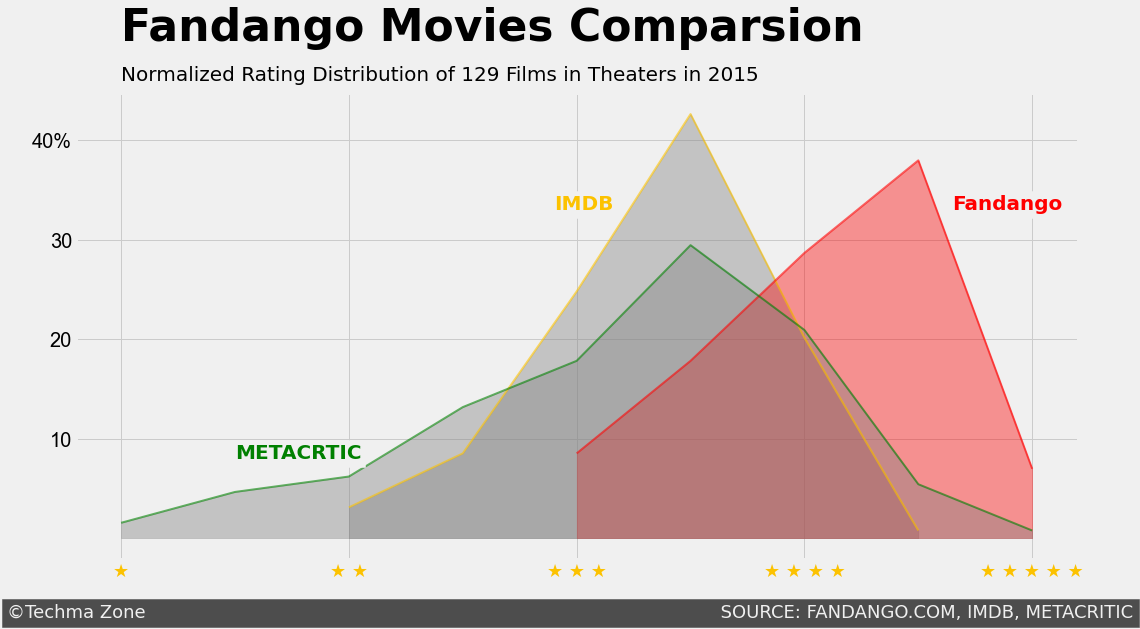

In [14]:
plt.figure(figsize=(16,8))

plt.fill_between(IMDB_norm_round.index, IMDB_norm_round, alpha = 0.4, color = "gray")
plt.plot(IMDB_norm_round.index, IMDB_norm_round, alpha = 0.6, lw = 2, color = "#fcc200")

plt.fill_between(fandango_stars_norm.index, fandango_stars_norm, alpha = 0.4, color = "red")
plt.plot(fandango_stars_norm.index, fandango_stars_norm, alpha = 0.6, lw = 2, color = "red")

plt.fill_between(Metacritic_user_norm_round.index, Metacritic_user_norm_round, alpha = 0.4, color = "gray")
plt.plot(Metacritic_user_norm_round.index, Metacritic_user_norm_round, alpha = 0.6, lw = 2, color = "green")


plt.text(1, 50, "Fandango Movies Comparsion", size = 44, weight = "bold")
plt.text(1, 46, "Normalized Rating Distribution of 129 Films in Theaters in 2015", size = 20)

plt.yticks([10,20,30,40], ["10","20","30","40%"], fontsize = 20, fontfamily = "Arial")

plt.xticks([1,2,3,4,5],\
           labels =  ["\u2605","\u2605 \u2605","\u2605 \u2605 \u2605","\u2605 \u2605 \u2605 \u2605", "\u2605 \u2605 \u2605 \u2605 \u2605"],\
           fontsize = 18, color = "#fcc200")

plt.text(4.65, 33, "Fandango", color = 'red', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")
plt.text(2.9, 33, "IMDB", color = '#fcc200', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")
plt.text(1.5, 8, "METACRTIC", color = 'green', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")

plt.text(0.5, -8,"©Techma Zone" + " "*100 + "SOURCE: FANDANGO.COM, IMDB, METACRITIC",
        color = "#F0F0F0", backgroundcolor = "#4d4d4d", size = 18)

plt.show()

In [15]:
# Actual Rating Data

In [16]:
fandango_scrape = pd.read_csv("scrape_fandango_2015.csv")

In [17]:
fandango_scrape = fandango_scrape[fandango_scrape["VOTES"] > 30]

In [18]:
fandango_scrape.shape

(210, 4)

In [19]:
fandango_scrape_stars = round(fandango_scrape.STARS.value_counts(normalize=True)*100, 2).sort_index()

In [20]:
fandango_scrape_stars

3.0     7.14
3.5    14.29
4.0    27.14
4.5    36.19
5.0    15.24
Name: STARS, dtype: float64

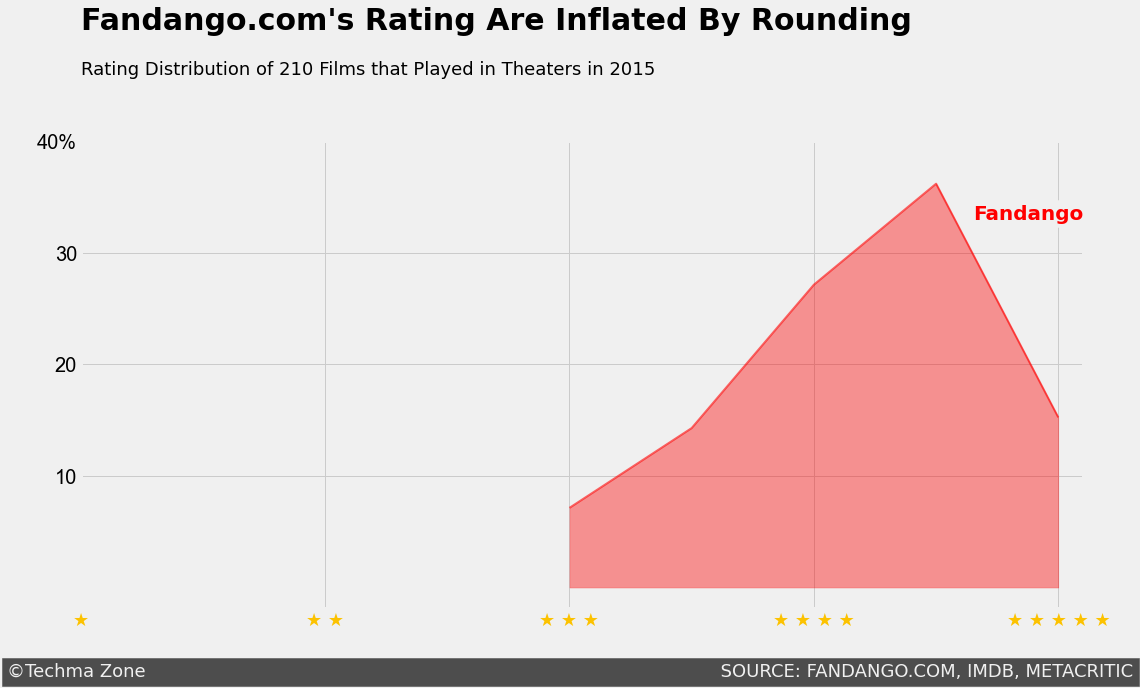

In [21]:
plt.figure(figsize=(16,8))

plt.fill_between(fandango_scrape_stars.index, fandango_scrape_stars, alpha = 0.4, color = "red")
plt.plot(fandango_scrape_stars.index, fandango_scrape_stars, alpha = 0.6, lw = 2, color = "red")



plt.text(1, 50, "Fandango.com's Rating Are Inflated By Rounding", size = 30, weight = "bold")
plt.text(1, 46, "Rating Distribution of 210 Films that Played in Theaters in 2015", size = 18)

plt.yticks([10,20,30,40], ["10","20","30","40%"], fontsize = 20, fontfamily = "Arial")

plt.xticks([1,2,3,4,5],\
           labels =  ["\u2605","\u2605 \u2605","\u2605 \u2605 \u2605","\u2605 \u2605 \u2605 \u2605", "\u2605 \u2605 \u2605 \u2605 \u2605"],\
           fontsize = 18, color = "#fcc200")

plt.text(4.65, 33, "Fandango", color = 'red', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")

plt.text(0.7, -8,"©Techma Zone" + " "*100 + "SOURCE: FANDANGO.COM, IMDB, METACRITIC",
        color = "#F0F0F0", backgroundcolor = "#4d4d4d", size = 18)

plt.show()

In [23]:
def rating_system(x):
    if x > 0 and x < 0.25:
        return 0 
    elif x > 0.25 and x < 0.75:
        return 0.5
    elif x > 0.75 and x < 1.25:
        return 1
    elif x > 1.25 and x < 1.75:
        return 1.5
    elif x > 1.75 and x < 2.25:
        return 2
    elif x > 2.25 and x < 2.75:
        return 2.5
    elif x > 2.75 and x < 3.25:
        return 3
    elif x > 3.25 and x < 3.75:
        return 3.5
    elif x > 3.75 and x < 4.25:
        return 4
    elif x > 4.25 and x < 4.75:
        return 4.5
    elif x > 4.75:
        return 5
    else:
        return x

In [24]:
fandango_scrape['RATING'] = fandango_scrape["RATING"].apply(rating_system)

In [25]:
fandango_scrape_rating = (fandango_scrape["RATING"].value_counts(normalize=True)*100).sort_index()
fandango_scrape_rating

2.5     1.904762
3.0    10.952381
3.5    20.476190
4.0    35.238095
4.5    26.666667
5.0     4.761905
Name: RATING, dtype: float64

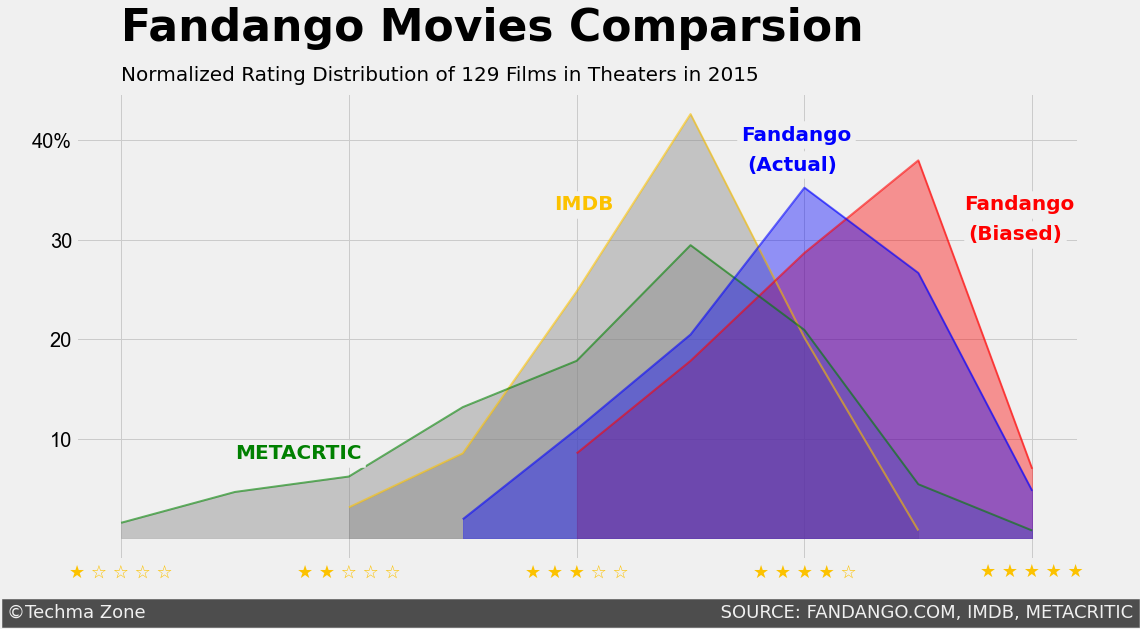

In [26]:
plt.figure(figsize=(16,8))

plt.fill_between(IMDB_norm_round.index, IMDB_norm_round, alpha = 0.4, color = "gray")
plt.plot(IMDB_norm_round.index, IMDB_norm_round, alpha = 0.6, lw = 2, color = "#fcc200")

plt.fill_between(fandango_stars_norm.index, fandango_stars_norm, alpha = 0.4, color = "red")
plt.plot(fandango_stars_norm.index, fandango_stars_norm, alpha = 0.6, lw = 2, color = "red")

plt.fill_between(Metacritic_user_norm_round.index, Metacritic_user_norm_round, alpha = 0.4, color = "gray")
plt.plot(Metacritic_user_norm_round.index, Metacritic_user_norm_round, alpha = 0.6, lw = 2, color = "green")

plt.fill_between(fandango_scrape_rating.index, fandango_scrape_rating, alpha = 0.4, color = "Blue")
plt.plot(fandango_scrape_rating.index, fandango_scrape_rating, alpha = 0.6, lw = 2, color = "Blue")


plt.text(1, 50, "Fandango Movies Comparsion", size = 44, weight = "bold")
plt.text(1, 46, "Normalized Rating Distribution of 129 Films in Theaters in 2015", size = 20)

plt.yticks([10,20,30,40], ["10","20","30","40%"], fontsize = 20, fontfamily = "Arial")

plt.xticks([1,2,3,4,5],\
           labels =  ["\u2605 \u2606 \u2606 \u2606 \u2606","\u2605 \u2605 \u2606 \u2606 \u2606"\
                      ,"\u2605 \u2605 \u2605 \u2606 \u2606"\
                      ,"\u2605 \u2605 \u2605 \u2605 \u2606", "\u2605 \u2605 \u2605 \u2605 \u2605"],\
           fontsize = 18, color = "#fcc200")

plt.text(4.70, 33, "Fandango", color = 'red', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")
plt.text(2.9, 33, "IMDB", color = '#fcc200', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")
plt.text(1.5, 8, "METACRTIC", color = 'green', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")
plt.text(4.72, 30, "(Biased)", color = 'red', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")
plt.text(3.72, 40, "Fandango", color = 'Blue', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")
plt.text(3.75, 37, "(Actual)", color = 'Blue', weight = "bold", size = 20, backgroundcolor = "#F0F0F0")

plt.text(0.5, -8,"©Techma Zone" + " "*100 + "SOURCE: FANDANGO.COM, IMDB, METACRITIC",
        color = "#F0F0F0", backgroundcolor = "#4d4d4d", size = 18)

plt.show()